<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression as LR # 逻辑回归
from sklearn.datasets import load_breast_cancer # 乳腺癌
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000) # L1 正则化
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000) # L2 正则化

In [4]:
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)
lrl1.coef_

array([[ 4.00944785,  0.03208767, -0.13825862, -0.01624155,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50498228,  0.        , -0.07127128,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24602596, -0.12877609, -0.0143937 ,  0.        ,
         0.        , -2.03071952,  0.        ,  0.        ,  0.        ]])

In [5]:
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [6]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61520498e+00,  1.03165077e-01,  4.89949912e-02,
        -4.54501839e-03, -9.48008442e-02, -3.01421091e-01,
        -4.56859977e-01, -2.23258644e-01, -1.36553775e-01,
        -1.93906452e-02,  1.51863698e-02,  8.84898768e-01,
         1.16165402e-01, -9.44763010e-02, -9.89655843e-03,
        -2.29725881e-02, -5.65958129e-02, -2.71050978e-02,
        -2.78528014e-02,  3.23039398e-04,  1.25588920e+00,
        -3.02228846e-01, -1.72470625e-01, -2.21057469e-02,
        -1.74443731e-01, -8.78235976e-01, -1.16396035e+00,
        -4.29422429e-01, -4.23200446e-01, -8.69294093e-02]])

In [8]:
l1 = []
l2 = []
l1test = []
l2test = []
# 切分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

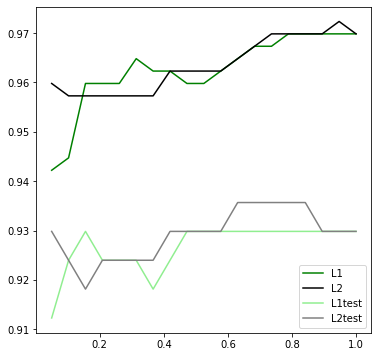

In [9]:
# 遍历: 从 0.05 到 1
for i in np.linspace(0.05,1,19):
    # 对C的值进行调参, 迭代1000次
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    # 训练L1,保存训练集准确率,和测试集准确率
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    # 训练L2,保存训练集准确率,和测试集准确率
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

# 绘图
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]    

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


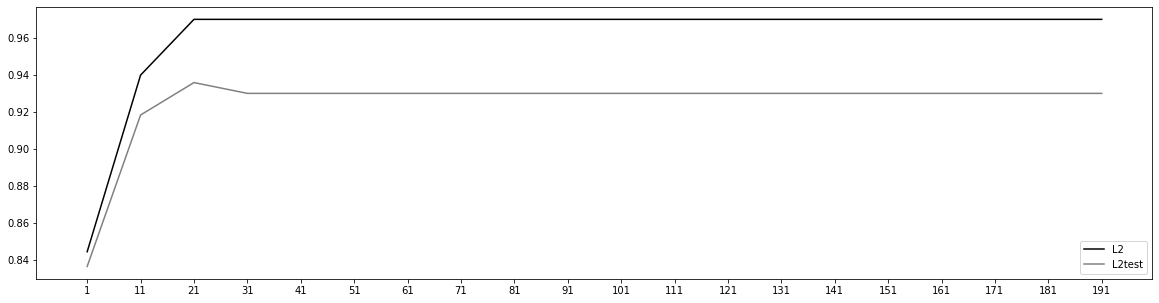

In [10]:
#max_iter的学习曲线
l2 = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
    
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [12]:
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300)
lr.fit(Xtrain,Ytrain)
lr.n_iter_

array([24], dtype=int32)

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

for multi_class in ('multinomial', 'ovr'):
    clf = LR(solver='sag', max_iter=100, random_state=42,
             multi_class=multi_class).fit(iris.data, iris.target)
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target), multi_class))

training score : 0.987 (multinomial)
training score : 0.960 (ovr)


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
